# Unsupervised Learning - Data Clustering
#### Edmar Junyor Bevilaqua

### K-means - Demo 2

* Use of the K-means algorithm with different parameters.
* Synthetic database
* Exploring the limitations of K-means

In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors

from sklearn.cluster import KMeans
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs

%matplotlib inline

sns.set(style='darkgrid', context='talk', rc={'figure.figsize': (14, 8)})

### Creating synthetic dataset

In [3]:
X, y = make_blobs(n_samples=1000, centers=7, n_features=2,
                  random_state=33)

df = pd.DataFrame(X, columns=['x', 'y'])
df['label'] = y

df.head()

,x,y,label
0,7.415416,-5.293543,2
1,-3.898435,-0.410129,0
2,-6.065070,-0.514075,0
3,-7.980452,8.115292,3
4,10.479860,-0.900095,5


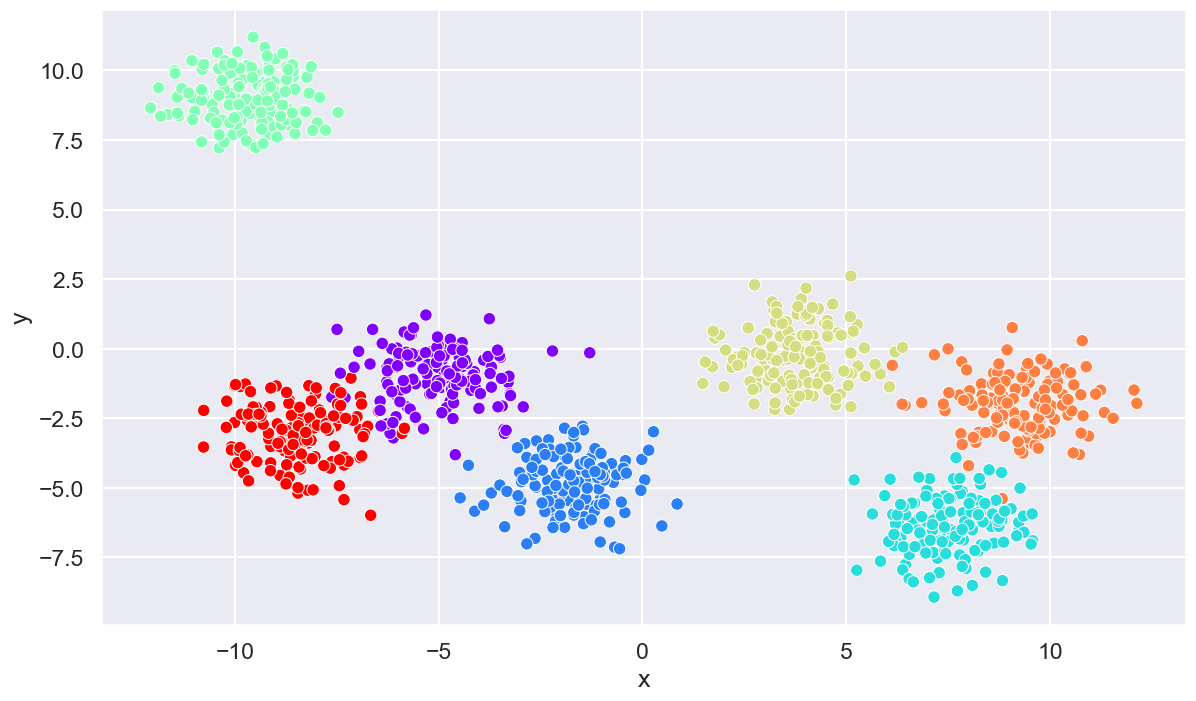

In [4]:
_ = sns.scatterplot(x='x', y='y', data=df, hue='label', palette='rainbow', legend=False)

### Testing KMeans

In [9]:
import warnings

def train_and_plot(data, k=3, init='k-means++', n_init=10, max_iter=300,
                   algorithm='lloyd', verbose=0, random_state=133):
    # Ignoring the warnings because KMeans have a memory leak.
    warnings.filterwarnings('ignore')
    # We copy the data and remove the label column
    data_copy = data.copy()
    data_copy.drop(columns='label', inplace=True)
    
    model = KMeans(n_clusters=k, init=init, n_init=n_init, max_iter=max_iter,
                   algorithm=algorithm, random_state=random_state, verbose=verbose)
    model.fit(data_copy)
    
    data_copy['cluster_labels'] = model.labels_
    _ = sns.scatterplot(x='x', y='y', data=data_copy, hue='cluster_labels', palette='rainbow', legend=False)

    centroids = model.cluster_centers_
    centroids_x = centroids[:,0]
    centroids_y = centroids[:,1]

    _ = plt.scatter(centroids_x, centroids_y, color='black', s=100)
    
    warnings.filterwarnings('default')
    
    return model

### Initialization

Differences in execution between Scikit's standard initialization (`k-means++`) and `random` initialization.<br> Note the difference in the clustering result.

KMeans(n_clusters=7, n_init=10, random_state=133)

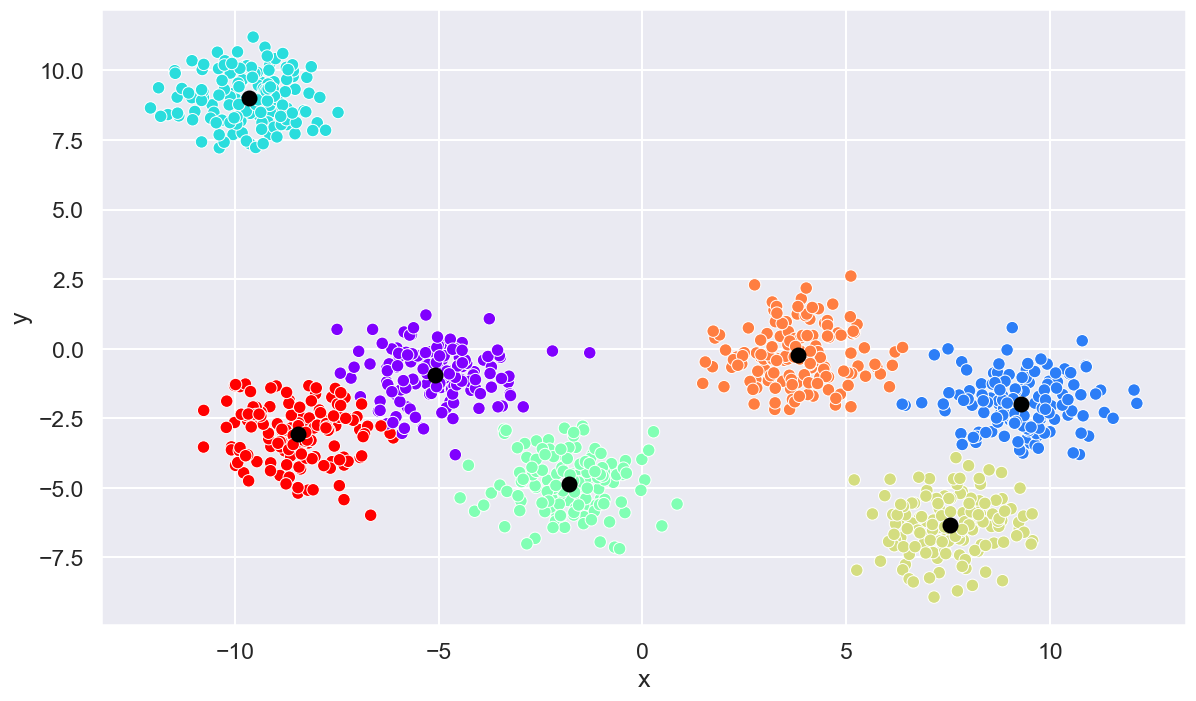

In [10]:
train_and_plot(df, k=7)

KMeans(init='random', n_clusters=7, n_init=2, random_state=500)

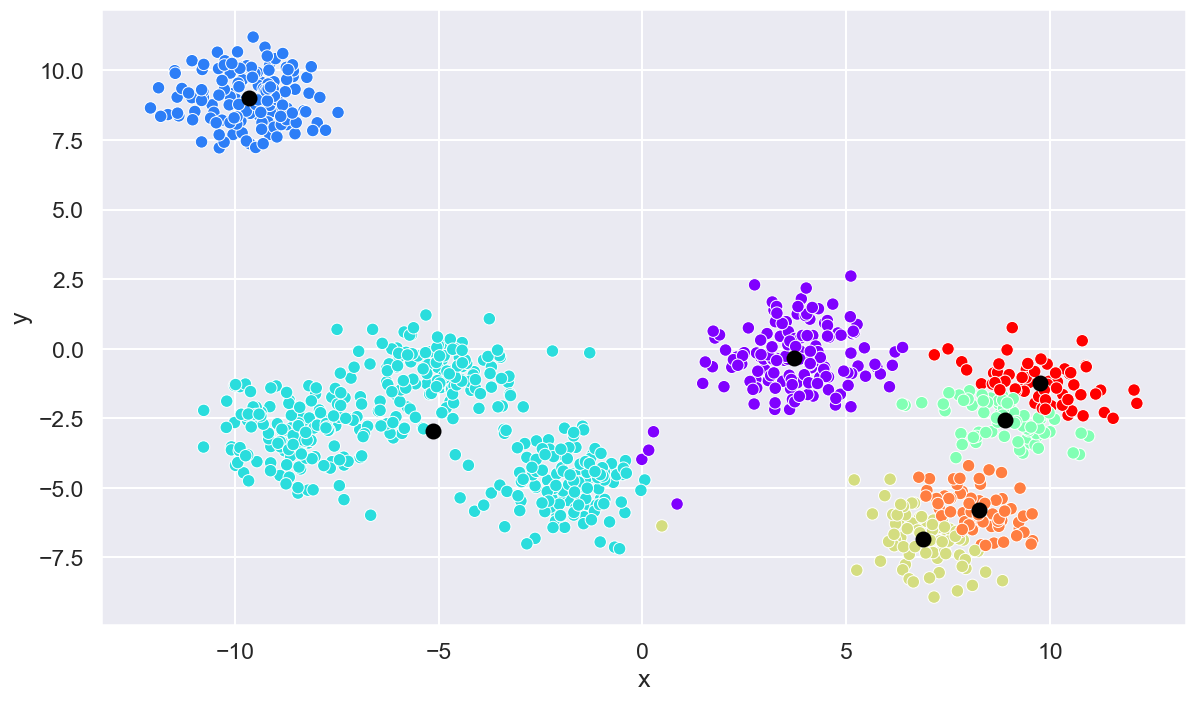

In [11]:
train_and_plot(df, k=7, init='random', random_state=500, n_init=2)

KMeans(n_clusters=3, n_init=10, random_state=133)

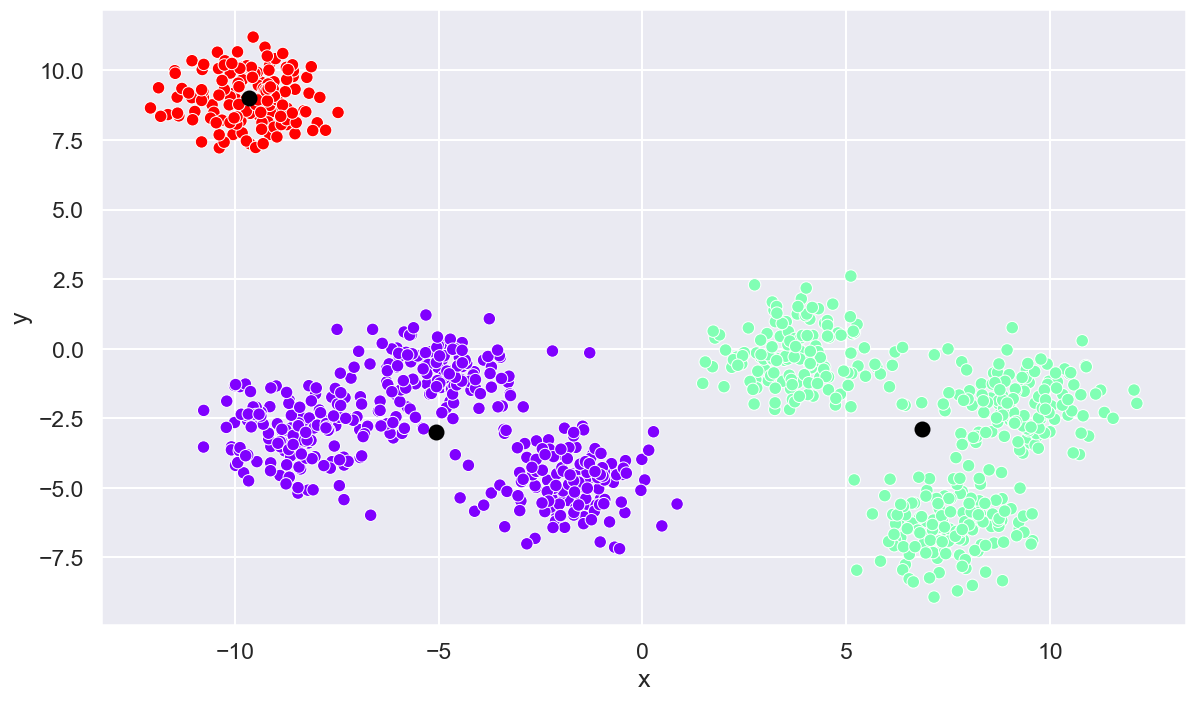

In [12]:
train_and_plot(df, k=3)

KMeans(init='random', n_clusters=3, n_init=10, random_state=133)

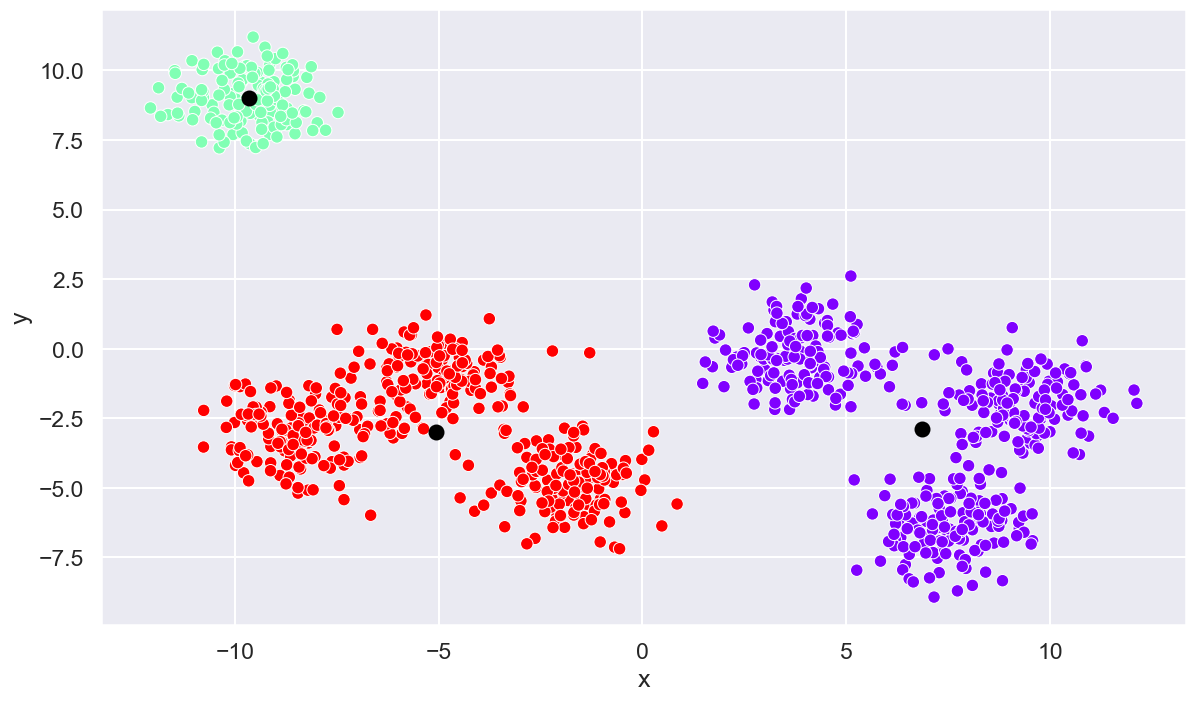

In [13]:
train_and_plot(df, k=3, init='random')

### Number of clusters
Differences in execution with different numbers of clusters.

KMeans(n_clusters=3, n_init=10, random_state=133)

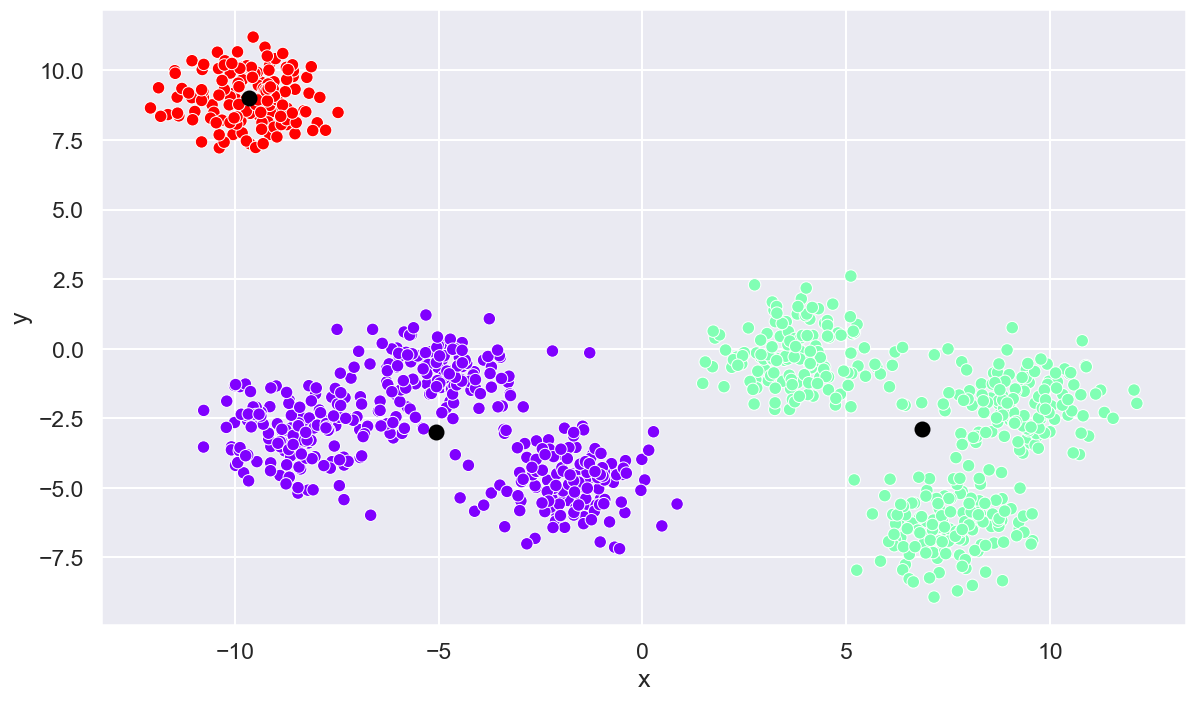

In [14]:
train_and_plot(df, k=3)

KMeans(n_clusters=4, n_init=10, random_state=133)

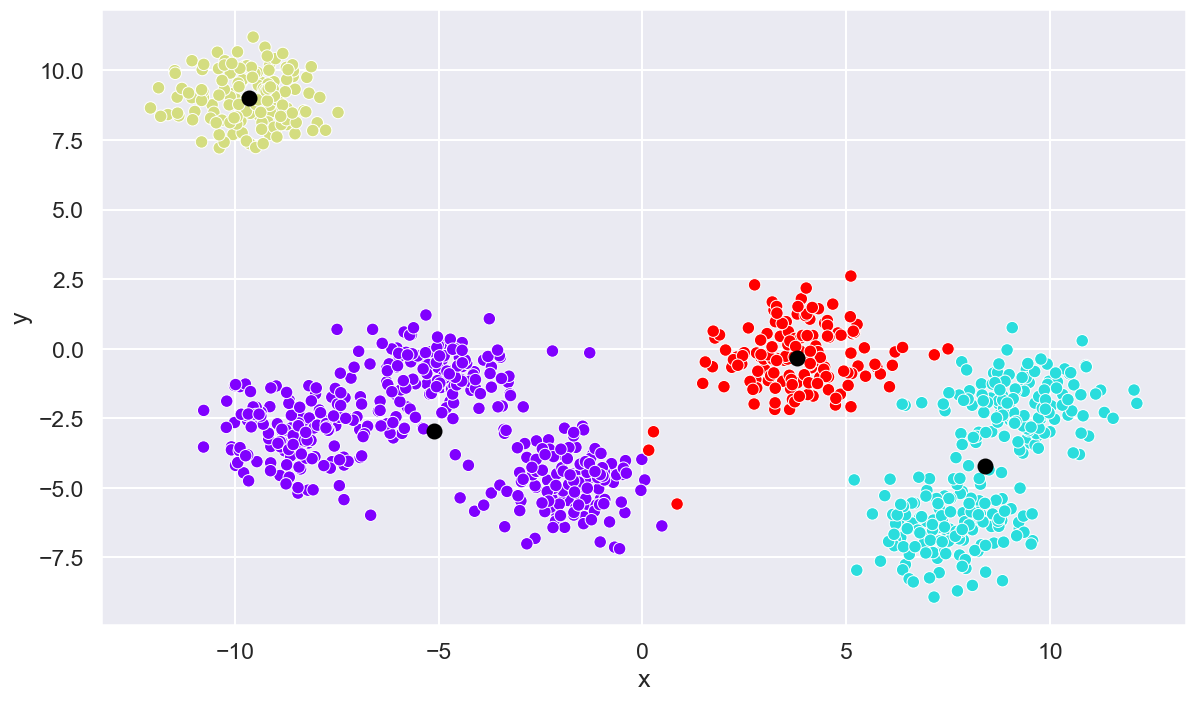

In [15]:
train_and_plot(df, k=4)

KMeans(n_clusters=5, n_init=10, random_state=133)

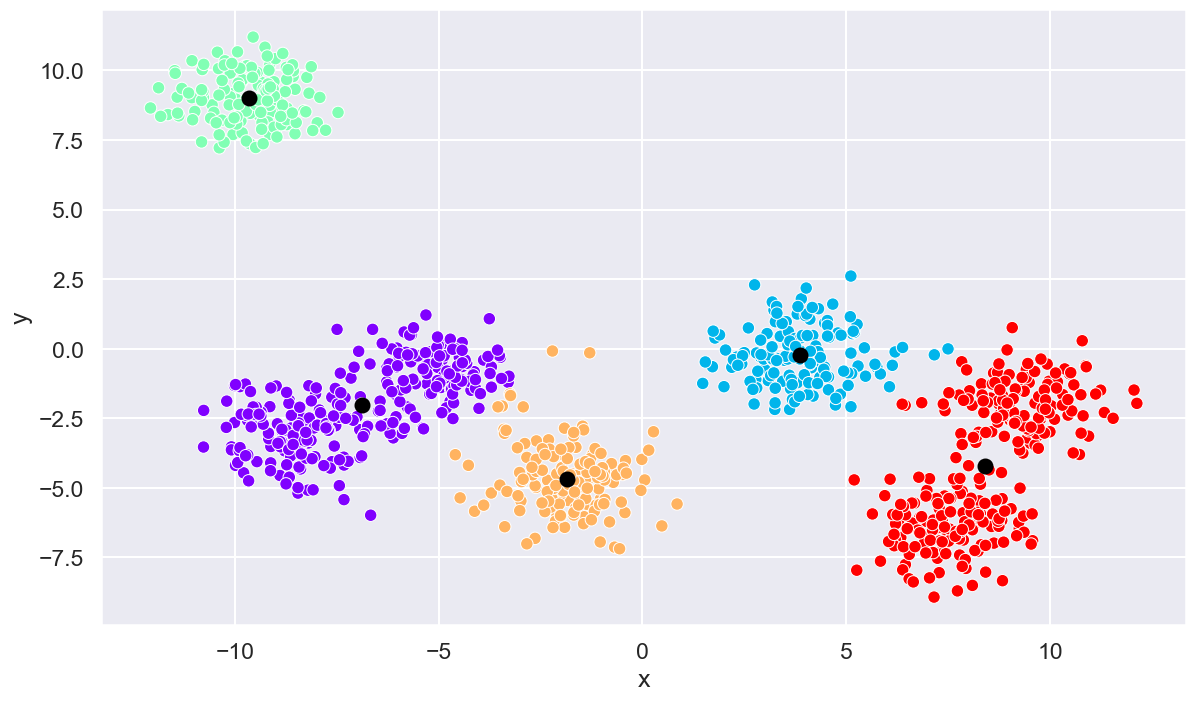

In [16]:
train_and_plot(df, k=5)

KMeans(n_clusters=6, n_init=10, random_state=133)

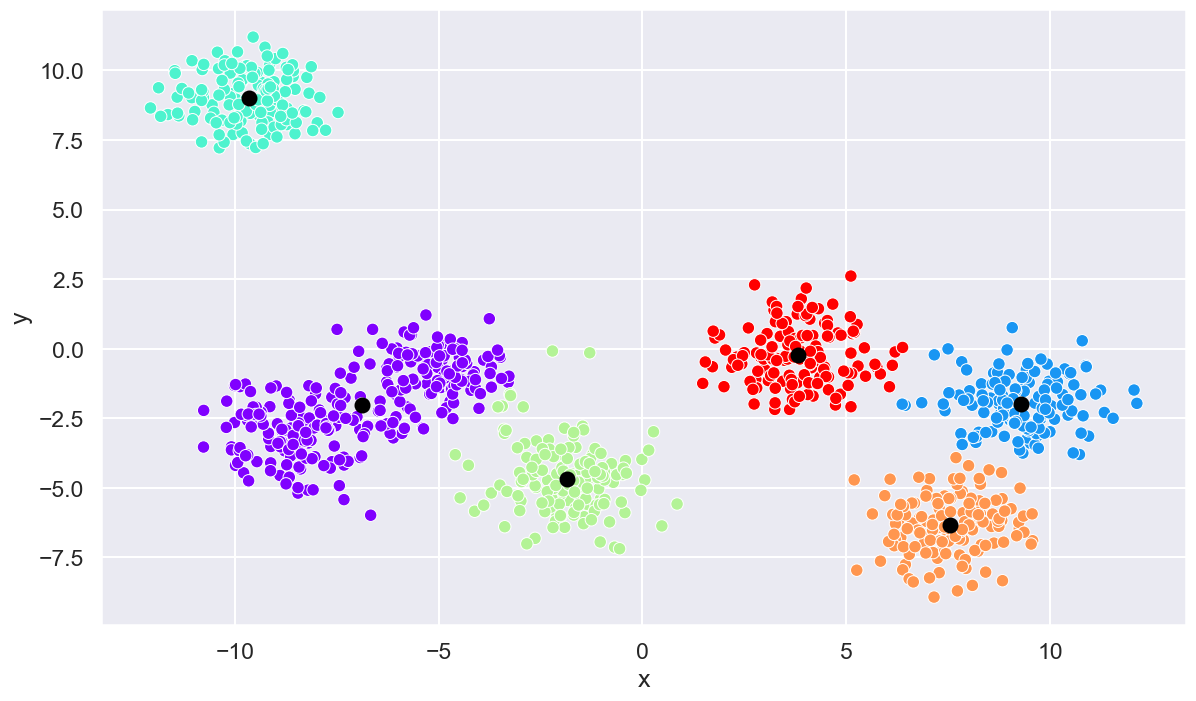

In [17]:
train_and_plot(df, k=6)

KMeans(n_clusters=10, n_init=10, random_state=133)

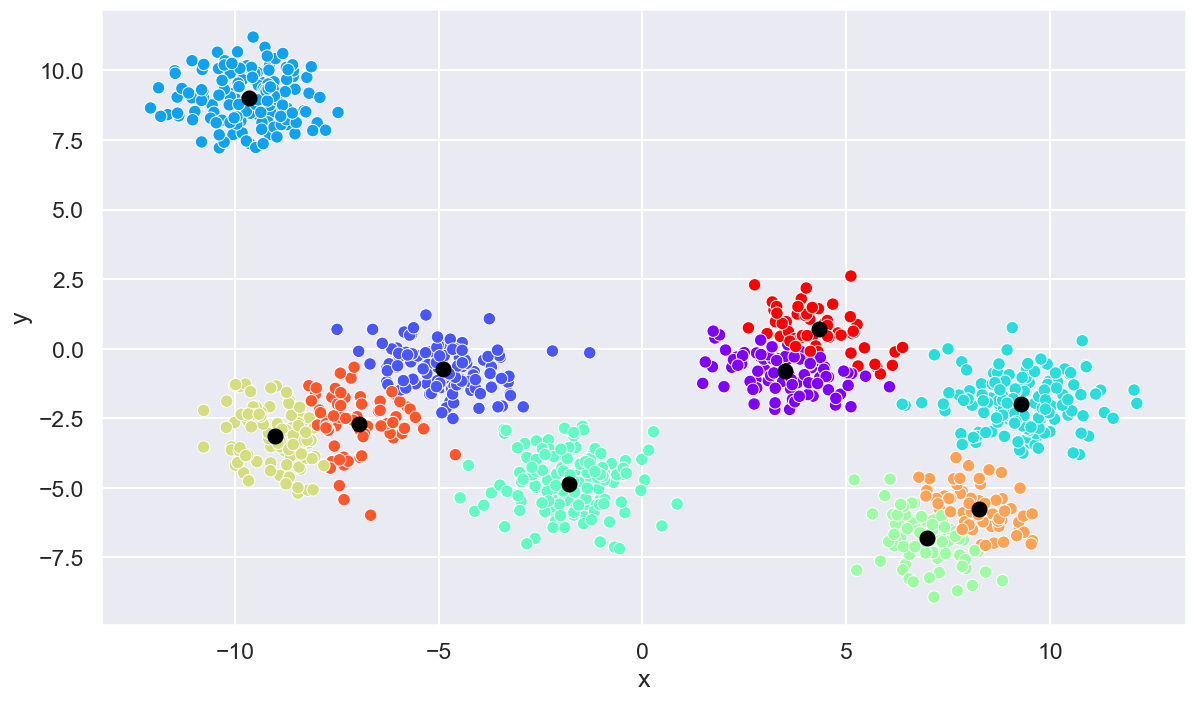

In [18]:
train_and_plot(df, k=10)

KMeans(init='random', n_clusters=10, n_init=10, random_state=233)

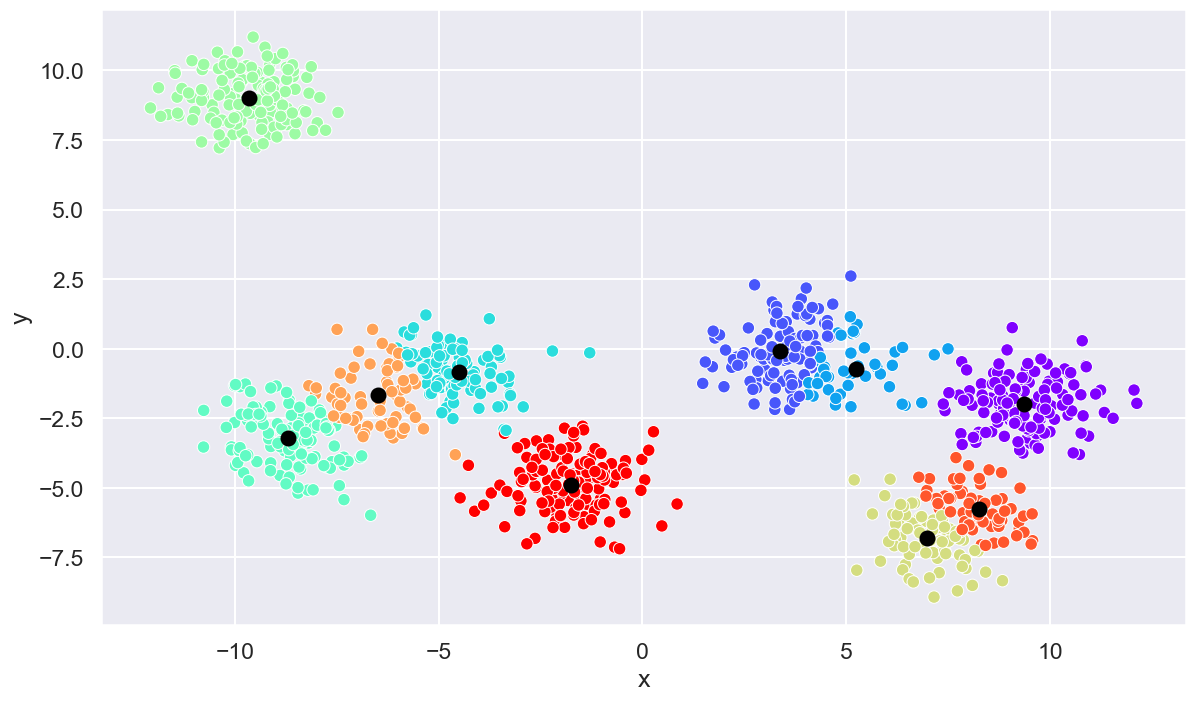

In [19]:
train_and_plot(df, k=10, init='random', random_state=233)

### Elbow
Let's see some differences when evaluating using the method with different values for the maximum number of Clusters.

In [23]:
import warnings

def do_elbow_and_plot(df, max_clusters):
    
    warnings.filterwarnings('ignore')
    
    min_clusters = 1

    clusters_range = range(min_clusters, max_clusters + 1)

    inertias = []

    for k in clusters_range:
        model = KMeans(n_clusters=k, random_state=33)
        model.fit(df)

        cur_inertia = model.inertia_
        inertias.append(cur_inertia)
        
    _ = plt.plot(clusters_range, inertias, '-o')
    _ = plt.title('O método elbow')
    _ = plt.xlabel('Número de clusters')
    _ = plt.ylabel('Inércia')
    _ = plt.xticks(clusters_range)
    
    warnings.filterwarnings('default')
    
    plt.show()    

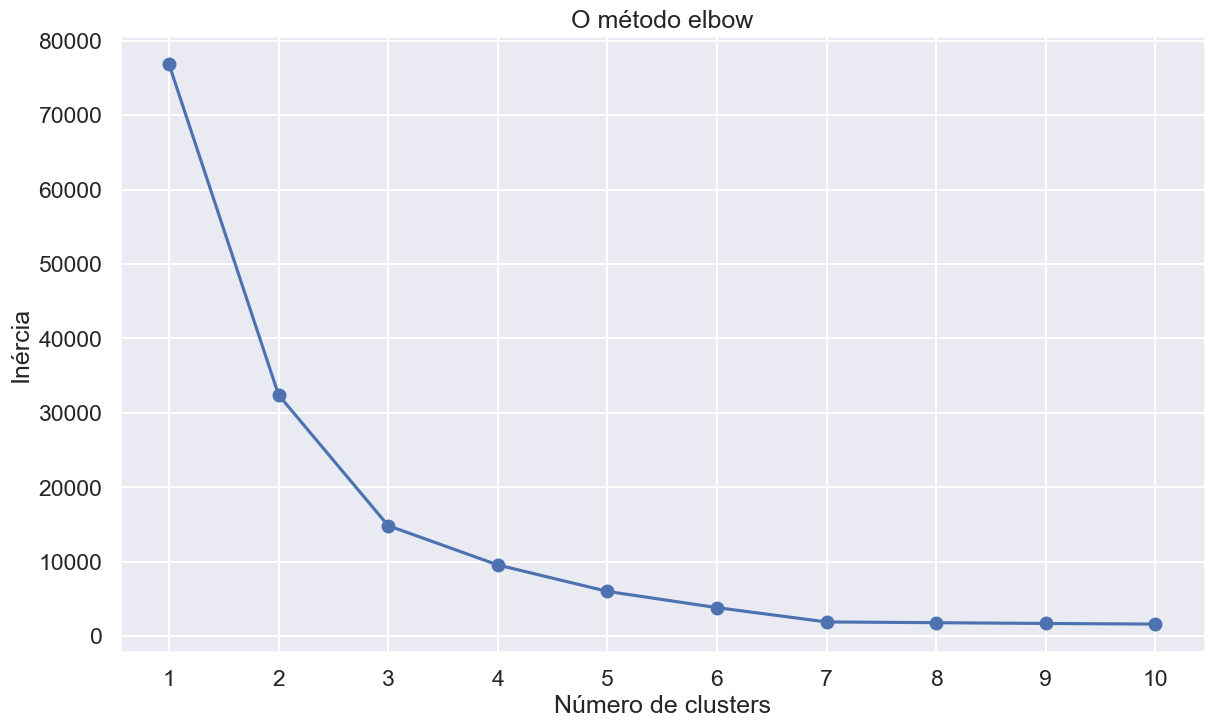

CPU times: total: 55.2 s
Wall time: 3.17 s


In [24]:
%%time

do_elbow_and_plot(df, max_clusters=10)

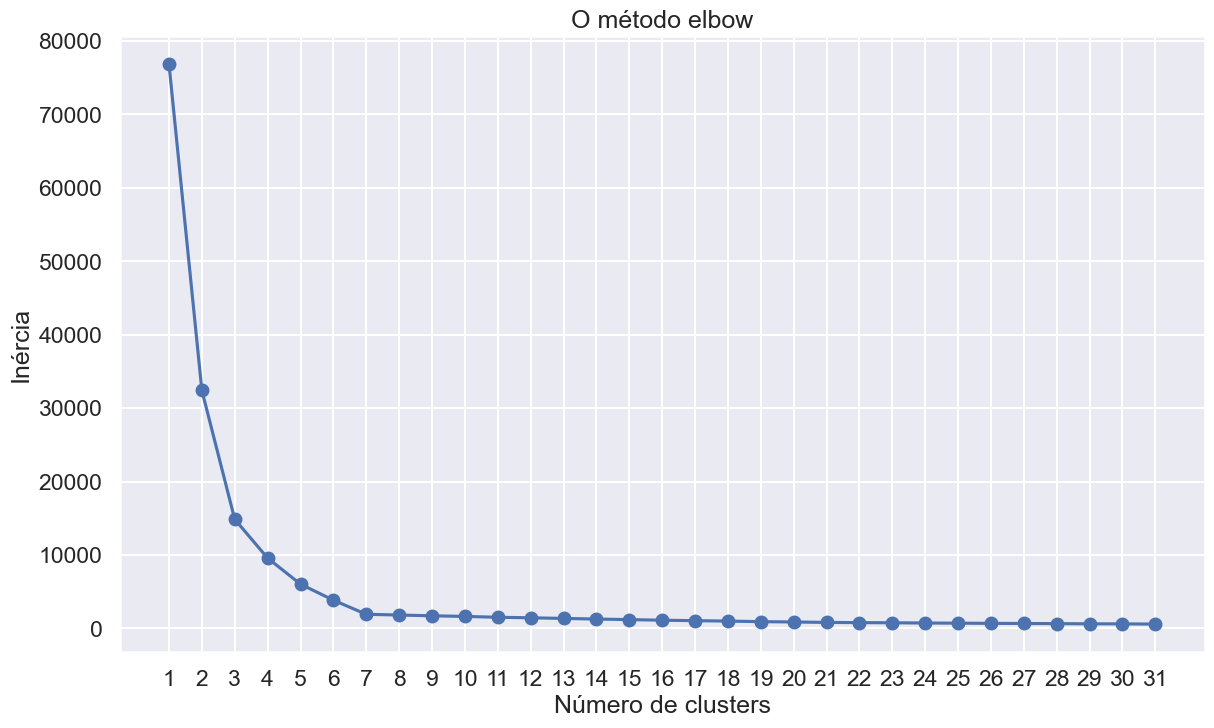

In [25]:
do_elbow_and_plot(df, max_clusters=int(np.sqrt(len(df))))

### Execution with a database of 1M records

In [36]:
X, y = make_blobs(n_samples=1000000, centers=7, n_features=2,
                  random_state=33)

df = pd.DataFrame(X, columns=['x', 'y'])

df.head()

,x,y
0,-9.507284,7.336711
1,-5.079856,-2.823110
2,-2.155830,-5.106045
3,1.812118,-0.337578
4,8.453084,-5.795128


In [37]:
start = time.time()
model = KMeans(n_clusters=7, algorithm='lloyd', random_state=33, n_init=10)
model.fit(df)
print(f'Time: {time.time() - start} seconds')
print('Inertia:', model.inertia_)

Time: 2.618196964263916 seconds
Inertia: 1963948.4122049347


## Some limitations
Runs with different results than K-means.

In [30]:
transformation = [[0.3, -0.3], [-1.2, 0.2]]

X, y = make_blobs(n_samples=1000, centers=7, n_features=2,
                  random_state=170)

df_transformed = pd.DataFrame(np.dot(X, transformation), columns=['x', 'y'])
df_transformed['label'] = y

df_transformed.head()

,x,y,label
0,3.775776,-2.551136,4
1,4.798597,-1.459384,5
2,3.910070,1.590275,0
3,5.554648,1.009466,0
4,-10.997360,2.443557,6


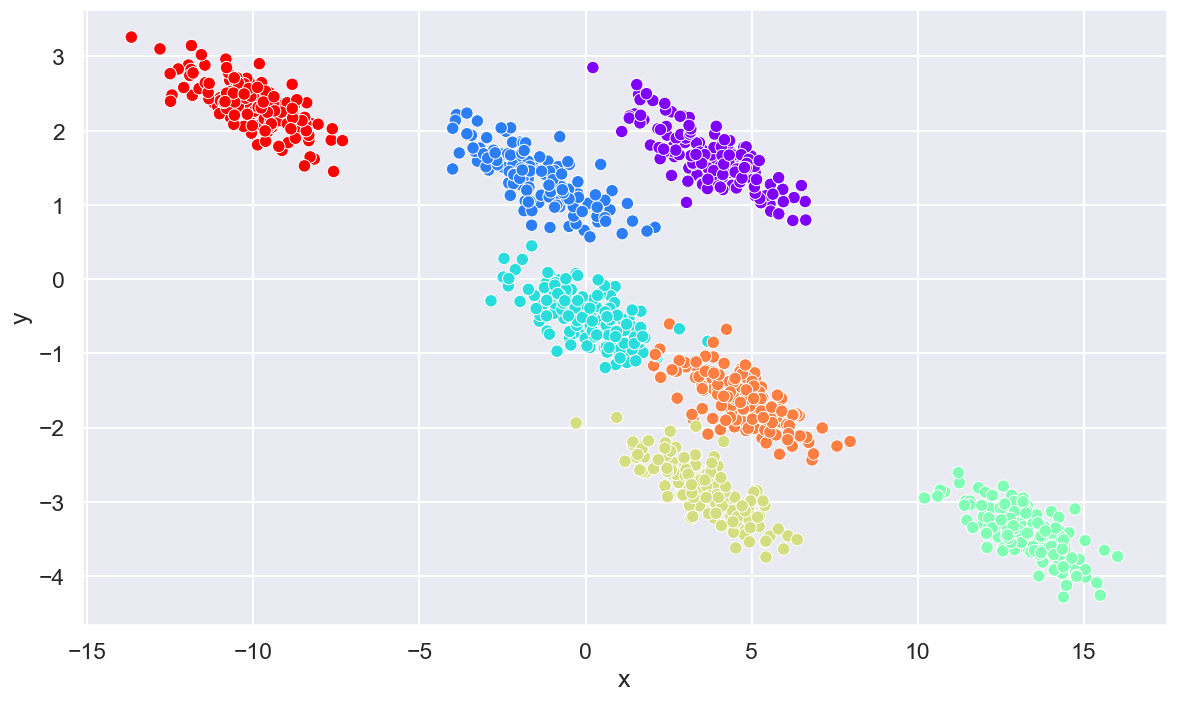

In [31]:
_ = sns.scatterplot(x='x', y='y', data=df_transformed, hue='label', palette='rainbow', legend=False)

KMeans(n_clusters=7, n_init=10, random_state=133)

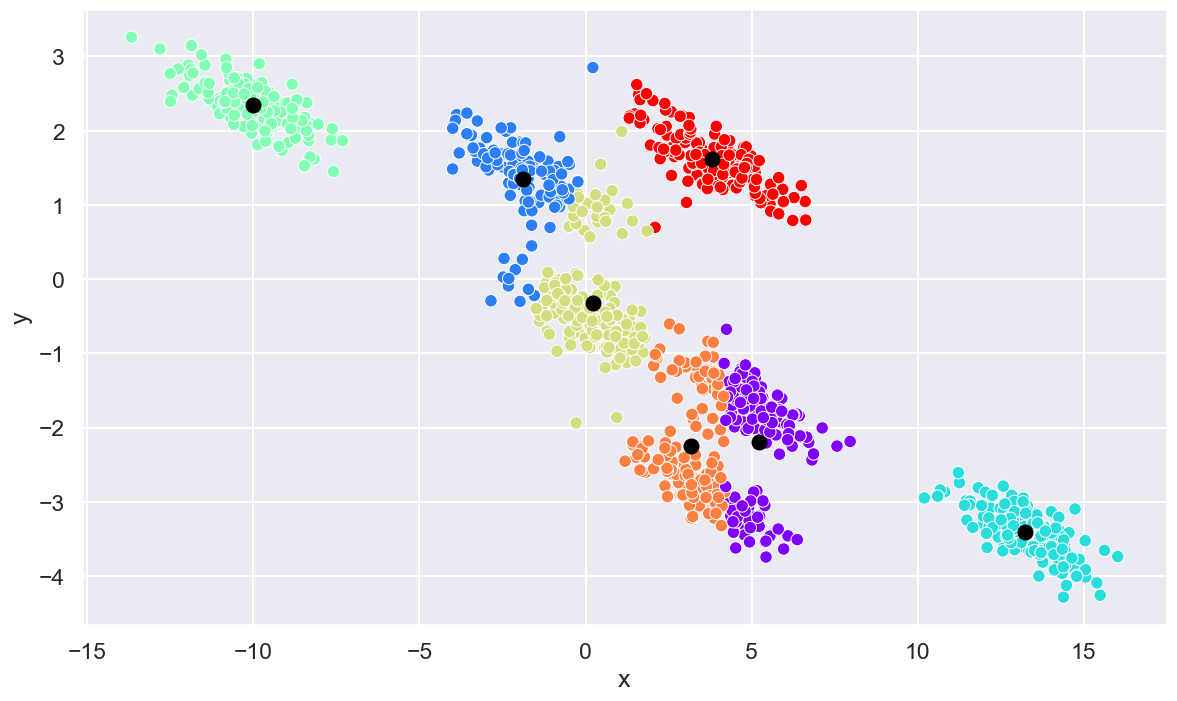

In [32]:
train_and_plot(df_transformed, k=7)

### Evaluating databases with different group formats

In [33]:
X, y = make_moons(300, noise=.05, random_state=33)

df_moon = pd.DataFrame(X, columns=['x', 'y'])
df_moon['label'] = y

df_moon.head()

,x,y,label
0,0.449533,-0.403077,1
1,1.860595,0.011092,1
2,1.842407,-0.086292,1
3,1.395956,-0.438878,1
4,0.479125,0.926415,0


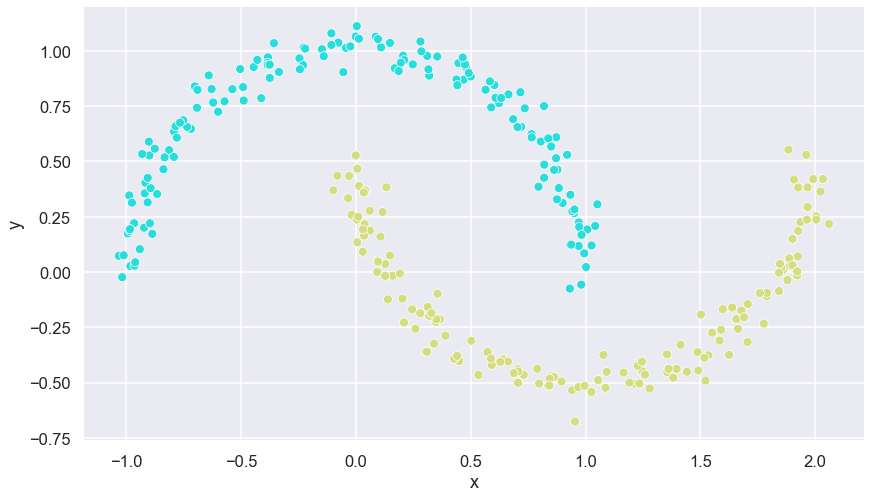

In [28]:
_ = sns.scatterplot(x='x', y='y', data=df_moon, hue='label', palette='rainbow', legend=False)

KMeans(n_clusters=2, n_init=10, random_state=133)

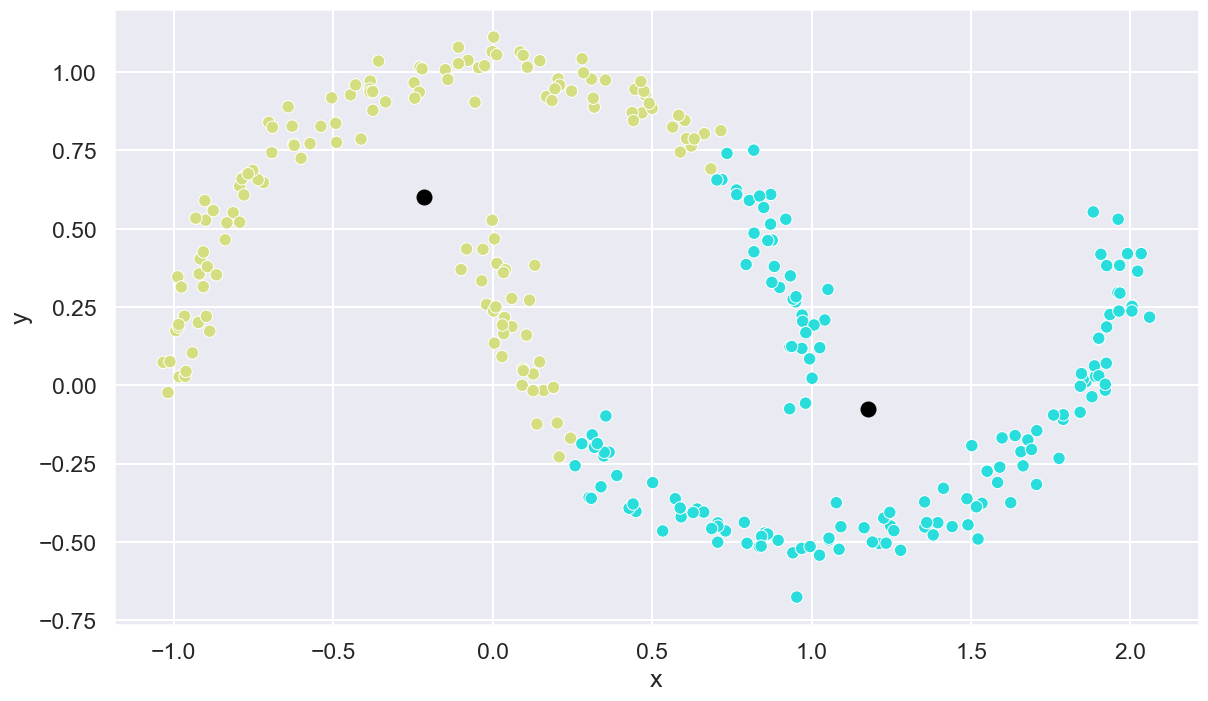

In [34]:
train_and_plot(df_moon, k=2)

KMeans(n_clusters=20, n_init=10, random_state=133)

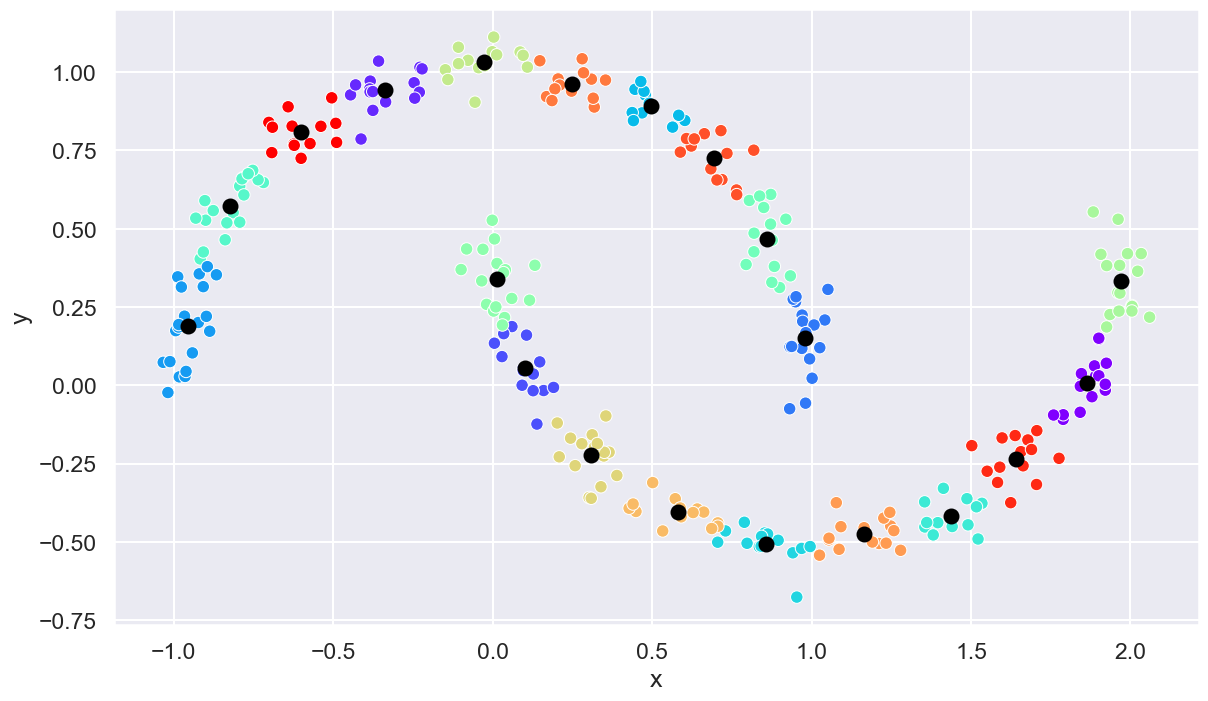

In [35]:
train_and_plot(df_moon, k=20)